In [3]:
import numpy as np
import pandas as pd

In [8]:
df=pd.read_csv('C:\\Users\\Ashok\\Bank_Personal_Loan_Modelling.csv')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [19]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
df['ZIP Code'].nunique()

467

In [10]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [17]:
df.groupby(['ZIP Code','Personal Loan']).size()

ZIP Code  Personal Loan
9307      0                 1
90005     0                 5
90007     0                 6
90009     0                 8
90011     0                 3
90016     0                 1
          1                 1
90018     0                 4
90019     0                 4
          1                 1
90024     0                49
          1                 1
90025     0                17
          1                 2
90027     0                 2
          1                 1
90028     0                 7
          1                 1
90029     0                 5
90032     0                 7
          1                 1
90033     0                 9
90034     0                19
          1                 1
90035     0                 6
90036     0                 7
90037     0                 4
          1                 1
90041     0                10
90044     0                 2
                           ..
95819     1                 1
95820     0     

In [21]:
df[df['Personal Loan']==1]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.70,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.10,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.30,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.00,3,0,1,1,1,1,0
42,43,32,7,132,90019,4,1.10,2,412,1,0,0,1,0
47,48,37,12,194,91380,4,0.20,3,211,1,1,1,1,1
53,54,50,26,190,90245,3,2.10,3,240,1,0,0,1,0
57,58,56,31,131,95616,2,1.20,3,0,1,0,0,0,0
75,76,31,7,135,94901,4,3.80,2,0,1,0,1,1,1


In [22]:
from imblearn.over_sampling import SMOTE

In [81]:
X=df.drop(['ID','ZIP Code','Personal Loan'],axis=1)

In [82]:
Y=df[['Personal Loan']]

In [83]:
X.shape

(5000, 11)

In [84]:
X.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [85]:
Y.columns

Index(['Personal Loan'], dtype='object')

In [25]:
Y.value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=2)

In [29]:
ytrain.value_counts()

0    3158
1     342
Name: Personal Loan, dtype: int64

In [30]:
smt=SMOTE()
x_train, y_train = smt.fit_sample(xtrain, ytrain)

In [31]:
np.bincount(y_train)

array([3158, 3158], dtype=int64)

In [32]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(xtest)

C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
from sklearn.metrics import accuracy_score, cohen_kappa_score

In [34]:
accuracy_score(ytest,y_pred)

0.9113333333333333

In [35]:
from sklearn.metrics import confusion_matrix

In [37]:
cm=confusion_matrix(ytest,y_pred)
cm

array([[1257,  105],
       [  28,  110]], dtype=int64)

In [38]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1362
           1       0.51      0.80      0.62       138

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.74      0.86      0.79      1500
weighted avg       0.94      0.91      0.92      1500



In [64]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [69]:
rf1=RandomForestClassifier()
knn1=KNeighborsClassifier()
dt1=DecisionTreeClassifier()
lr1=LogisticRegression()
nb1=GaussianNB()
bag=BaggingClassifier()
boost=AdaBoostClassifier()
models = [knn1, dt1, rf1,lr1,nb1,bag,boost]
for mod in models : 
    print(mod)
    print("\n")
    mod.fit(x_train,y_train)
    y_pred = mod.predict(xtest)
    print(accuracy_score(ytest,y_pred))
    conf_matrix1 = confusion_matrix(ytest, y_pred)
    print(conf_matrix1)
    print(classification_report(ytest, y_pred))
    print('Kappa score is',cohen_kappa_score(ytest,y_pred))
    print("\n \n")
    #print(y_pred)
    
 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


0.8726666666666667
[[1201  161]
 [  30  108]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1362
           1       0.40      0.78      0.53       138

   micro avg       0.87      0.87      0.87      1500
   macro avg       0.69      0.83      0.73      1500
weighted avg       0.92      0.87      0.89      1500

Kappa score is 0.46574024346580745

 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


0.9853333333333333
[[1350   12]
 [  10  128]]
              precisi

C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9113333333333333
[[1257  105]
 [  28  110]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1362
           1       0.51      0.80      0.62       138

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.74      0.86      0.79      1500
weighted avg       0.94      0.91      0.92      1500

Kappa score is 0.5756763654925983

 

GaussianNB(priors=None, var_smoothing=1e-09)


0.8953333333333333
[[1239  123]
 [  34  104]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1362
           1       0.46      0.75      0.57       138

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.72      0.83      0.76      1500
weighted avg       0.93      0.90      0.91      1500

Kappa score is 0.5142807642807643

 

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
      

C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')
Index(['Personal Loan'], dtype='object')
[0.04444438 0.04761965 0.31325026 0.1025597  0.16535194 0.17158061
 0.0303101  0.01042525 0.08165922 0.01281302 0.01998587]


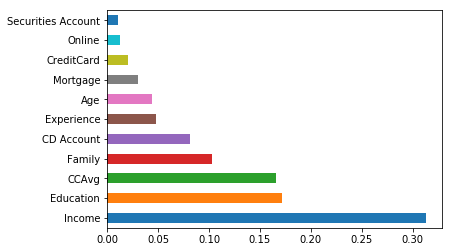

In [112]:
import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(X.columns)
print(Y.columns)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [87]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [88]:
Xnew=df[['CD Account','Family','CCAvg','Education','Income']]

In [90]:
Xnew.shape

(5000, 5)

In [93]:
Ynew=df[['Personal Loan']]

In [94]:
Ynew.shape

(5000, 1)

In [95]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [96]:
Xnew1=sc.fit_transform(Xnew)

C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [98]:
Xnew1=pd.DataFrame(Xnew1,columns=Xnew.columns)

In [99]:
Xnew1.head()

,CD Account,Family,CCAvg,Education,Income
0,-0.25354,1.397414,-0.193385,-1.049078,-0.538229
1,-0.25354,0.525991,-0.250611,-1.049078,-0.864109
2,-0.25354,-1.216855,-0.536736,-1.049078,-1.363793
3,-0.25354,-1.216855,0.436091,0.141703,0.569765
4,-0.25354,1.397414,-0.536736,0.141703,-0.625130


In [102]:
x_newtrain,x_newtest,y_newtrain,y_newtest=train_test_split(Xnew1,Ynew,test_size=0.3,random_state=2)

In [103]:
sm1=SMOTE()
x_train_new, y_train_new = smt.fit_sample(x_newtrain, y_newtrain)

C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [104]:
np.bincount(y_train_new)

array([3158, 3158], dtype=int64)

In [106]:
from sklearn.linear_model import LogisticRegression
LR1=LogisticRegression()
LR1.fit(x_train_new,y_train_new)
y_pred_new=LR1.predict(x_newtest)

C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [107]:
accuracy_score(y_newtest,y_pred_new)

0.9046666666666666

In [108]:
confusion_matrix(y_newtest,y_pred_new)

array([[1242,  120],
       [  23,  115]], dtype=int64)

In [110]:
print(classification_report(y_newtest,y_pred_new))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95      1362
           1       0.49      0.83      0.62       138

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.74      0.87      0.78      1500
weighted avg       0.94      0.90      0.92      1500



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


0.9793333333333333
[[1350   12]
 [  19  119]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1362
           1       0.91      0.86      0.88       138

   micro avg       0.98      0.98      0.98      1500
   macro avg       0.95      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500

Kappa score is 0.8734156539918986

 

0.9267541339462428


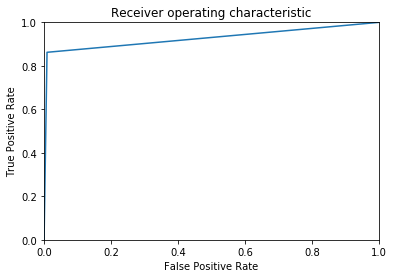

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


0.9853333333333333
[[1356    6]
 [  16  122]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1362
           1       0.95      0.88      0.92       138

   micro avg       0.99      0.99      0.99      1500
   macro avg       0.97      0.94      0.95      1500
weighted avg       0.99      0.99      0.99      1500

Kappa score is 0.9092588926285224

 

0.9398263423354402


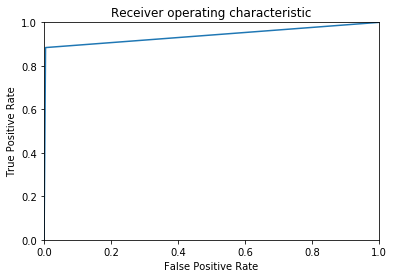

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


0.9846666666666667
[[1355    7]
 [  16  122]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1362
           1       0.95      0.88      0.91       138

   micro avg       0.98      0.98      0.98      1500
   macro avg       0.97      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500

Kappa score is 0.9054525124967114

 

0.9394592351401391


C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


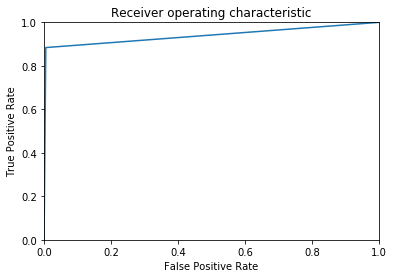

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


0.9046666666666666
[[1242  120]
 [  23  115]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      1362
           1       0.49      0.83      0.62       138

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.74      0.87      0.78      1500
weighted avg       0.94      0.90      0.92      1500

Kappa score is 0.5663512857836002

 

0.8726138032305433


C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


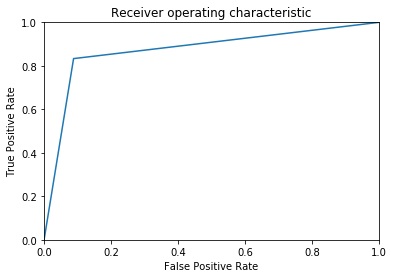

GaussianNB(priors=None, var_smoothing=1e-09)


0.8833333333333333
[[1224  138]
 [  37  101]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1362
           1       0.42      0.73      0.54       138

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.70      0.82      0.73      1500
weighted avg       0.92      0.88      0.90      1500

Kappa score is 0.4745123474584414

 

0.8152812360339654


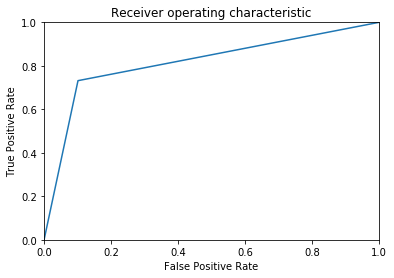

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)


0.9853333333333333
[[1354    8]
 [  14  124]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1362
           1       0.94      0.90      0.92       138

   micro avg       0.99      0.99      0.99      1500
   macro avg       0.96      0.95      0.96      1500
weighted avg       0.99      0.99      0.99      1500

Kappa score is 0.9104642833886827

 

0.9463385047564323


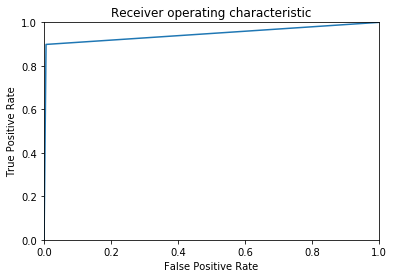

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)


0.942
[[1292   70]
 [  17  121]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1362
           1       0.63      0.88      0.74       138

   micro avg       0.94      0.94      0.94      1500
   macro avg       0.81      0.91      0.85      1500
weighted avg       0.95      0.94      0.95      1500

Kappa score is 0.703936622018948

 

0.9127082934303773


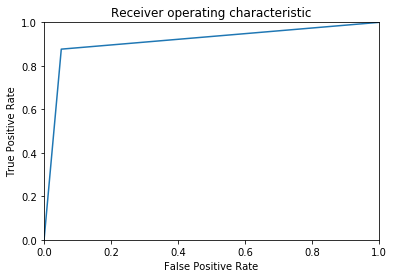

In [115]:
from sklearn.metrics import roc_curve, auc
rf1=RandomForestClassifier()
knn1=KNeighborsClassifier()
dt1=DecisionTreeClassifier()
lr1=LogisticRegression()
nb1=GaussianNB()
bag=BaggingClassifier()
boost=AdaBoostClassifier()
models = [knn1, dt1, rf1,lr1,nb1,bag,boost]
for mod in models : 
    print(mod)
    print("\n")
    mod.fit(x_train_new,y_train_new)
    y_pred1 = mod.predict(x_newtest)
    print(accuracy_score(y_newtest,y_pred1))
    conf_matrix1 = confusion_matrix(y_newtest, y_pred1)
    print(conf_matrix1)
    print(classification_report(y_newtest, y_pred1))
    print('Kappa score is',cohen_kappa_score(y_newtest,y_pred1))
    print("\n \n")
    #print(y_pred)
    
    fpr,tpr, _ = roc_curve(y_newtest, y_pred1)
    roc_auc = auc(fpr, tpr)
    print(roc_auc)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.show()
    
 